In [64]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
import pandas as pd
from seminartools.models.four_quarter_average_model import FourQuarterAverageModel
from seminartools.data import read_merged
from seminartools.data import read_inflation

# 1. Read data

In [75]:
#only european countries, excluding spain and portugal
df = read_merged(only_countries=["Italy", "Switzerland", "Germany", "Netherlands", "Norway", "Denmark", "Sweden", "France", "Belgium", "United Kingdom"]).reset_index()

#all countries
# df = read_merged().reset_index

In [4]:
df.pivot(index="date", columns="country", values="inflation")

country,Belgium,Denmark,France,Germany,Italy,Netherlands,Norway,Sweden,Switzerland,United Kingdom
date,,,,,,,,,,
1996-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
1997-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001095,NaN
1998-01-01,NaN,NaN,0.000000,NaN,0.007032,NaN,NaN,NaN,NaN,NaN
1998-04-01,0.006954,0.008368,NaN,0.002387,0.005587,0.007868,0.005162,0.003654,0.000000,0.011331
1998-07-01,NaN,NaN,NaN,NaN,0.001389,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-01-01,0.033275,0.021536,0.014870,0.018498,0.030160,0.029173,0.007055,0.016158,0.007859,NaN
2022-04-01,0.016949,0.032997,0.022894,0.028500,0.018298,0.024764,0.024113,0.032686,0.015595,NaN
2022-07-01,0.025000,0.023957,0.011638,0.016134,0.021563,0.040519,0.022995,0.030796,0.006718,NaN


# 2. AR model per country

In [5]:
model = FourQuarterAverageModel()
model

In [6]:
from warnings import filterwarnings

filterwarnings("ignore")
model.fit(df)

# 4. H-period ahead forecasting

In [7]:
from seminartools.models.utils import h_period_ahead_forecast

forecast = h_period_ahead_forecast(model, df, "2020-01-01", h=1)
forecast

,date,country,inflation
0,2020-01-01,Belgium,0.001163
1,2020-01-01,Denmark,0.001706
2,2020-01-01,France,0.002897
3,2020-01-01,Germany,0.003133
4,2020-01-01,Italy,0.000737
...,...,...,...
125,2023-01-01,Netherlands,0.027058
126,2023-01-01,Norway,0.016216
127,2023-01-01,Sweden,0.027675
128,2023-01-01,Switzerland,0.007345


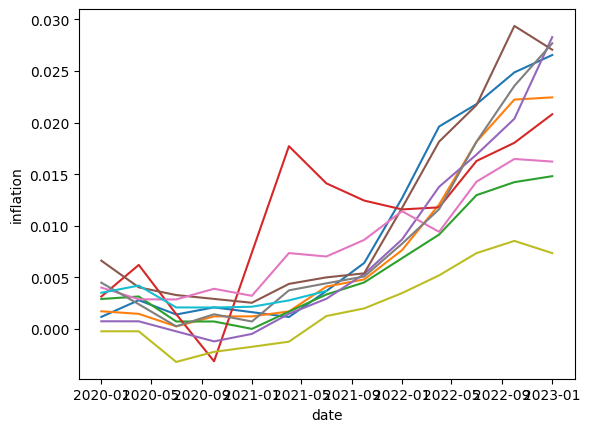

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=forecast, x="date", y="inflation", hue="country")
# turn off legend
plt.legend().remove()

In [9]:
df

,index,country,date,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
0,338,Switzerland,1996-04-01,0.000000,-0.263939,1.500000,3.7,-0.045704,-0.094999,0.030666,-0.088572,-0.034433
1,362,Switzerland,1997-04-01,-0.001095,0.259949,1.000000,4.1,-0.072944,0.083561,-0.035117,-0.000766,-0.036033
2,376,Italy,1998-01-01,0.007032,-0.750889,5.500000,11.9,-0.232105,-0.034915,-0.026870,-0.037470,0.036927
3,377,France,1998-01-01,0.000000,0.975517,3.300000,12.1,-0.232105,-0.034915,-0.026870,-0.037470,0.036927
4,384,Sweden,1998-04-01,0.003654,1.362703,4.266667,8.9,-0.049098,-0.037057,-0.056925,-0.068441,-0.048643
...,...,...,...,...,...,...,...,...,...,...,...,...
890,2163,Denmark,2023-01-01,0.003145,0.906018,2.150000,5.0,-0.020410,-0.585458,0.002037,0.007418,0.043183
891,2164,Netherlands,2023-01-01,-0.013667,-0.494664,3.000000,3.7,-0.020410,-0.585458,0.002037,0.007418,0.043183
892,2165,Switzerland,2023-01-01,0.010084,0.309543,1.166667,4.4,-0.020410,-0.585458,0.002037,0.007418,0.043183
893,2166,Italy,2023-01-01,0.003938,0.552944,3.000000,8.3,-0.020410,-0.585458,0.002037,0.007418,0.043183


In [10]:
forecast

,date,country,inflation
0,2020-01-01,Belgium,0.001163
1,2020-01-01,Denmark,0.001706
2,2020-01-01,France,0.002897
3,2020-01-01,Germany,0.003133
4,2020-01-01,Italy,0.000737
...,...,...,...
125,2023-01-01,Netherlands,0.027058
126,2023-01-01,Norway,0.016216
127,2023-01-01,Sweden,0.027675
128,2023-01-01,Switzerland,0.007345


In [11]:
forecast_merged = forecast.copy().rename(
    columns={"inflation": "pred"}
).merge(
    df[["country", "date", "inflation"]],
    on=["country", "date"],
    how="left",
).rename(columns={"inflation": "actual"})
forecast_merged.tail(100)

,date,country,pred,actual
30,2020-10-01,Belgium,0.002086,-0.000920
31,2020-10-01,Denmark,0.001212,-0.000964
32,2020-10-01,France,0.000717,-0.001907
33,2020-10-01,Germany,-0.003139,NaN
34,2020-10-01,Italy,-0.001210,-0.001947
...,...,...,...,...
125,2023-01-01,Netherlands,0.027058,-0.013667
126,2023-01-01,Norway,0.016216,0.006886
127,2023-01-01,Sweden,0.027675,0.014955
128,2023-01-01,Switzerland,0.007345,0.010084


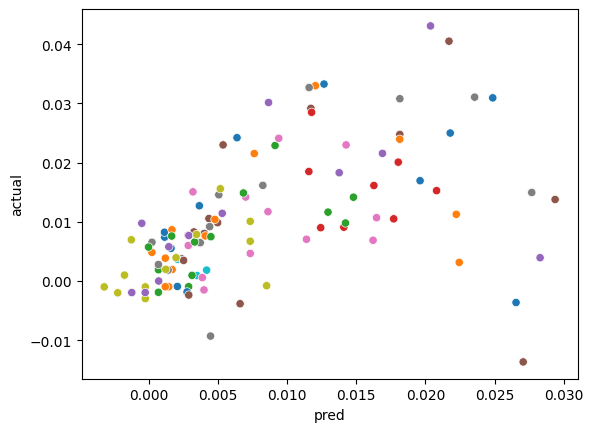

In [12]:
sns.scatterplot(data=forecast_merged, x="pred", y="actual", hue="country")
plt.legend().remove()

In [13]:
import statsmodels.api as sm

sm.OLS(
    forecast_merged["actual"], sm.add_constant(forecast_merged["pred"]), missing="drop"
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     37.02
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           1.64e-08
Time:                        13:55:43   Log-Likelihood:                 374.65
No. Observations:                 115   AIC:                            -745.3
Df Residuals:                     113   BIC:                            -739.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0048      0.001      3.864      0.000       0.002       0.007
pred           0.6674      0.110      6.084      0.000       0.450       0.885
==============================================================================
Omnibus:                        8.944   Durbin-Watson:                   1.056
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               18.834
Skew:                          -0.125   Prob(JB):                     8.13e-05
Kurtosis:                       4.967   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# expanding window crossval
from seminartools.time_series_split import ExpandingWindowSplit

tss = ExpandingWindowSplit(start_date = "2000-01-01")
tss

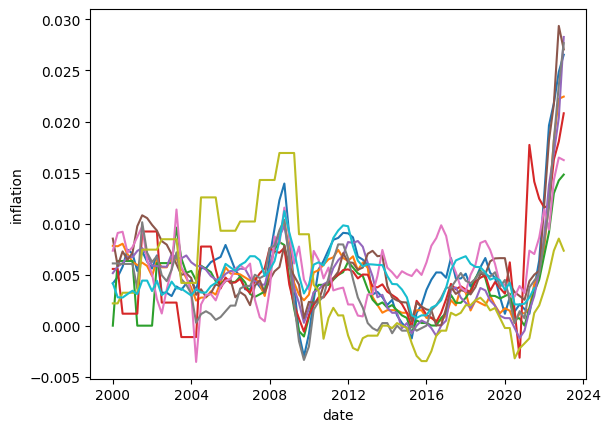

In [15]:
from seminartools.models.utils import make_oos_predictions

sns.lineplot(
    data = make_oos_predictions(lambda: model, df, tss),
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# ARMAX

In [16]:
from seminartools.models.armax_model import ARMAXModel
preds = make_oos_predictions(lambda: ARMAXModel(max_p = 2, max_q = 2), df, tss, progress = True, num_cores = 5)
preds

Splits: 100%|██████████| 5/5 [00:00<00:00, 130.97it/s]
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive p

,date,country,inflation
0,2004-10-01,Italy,0.004525
1,2004-10-01,France,0.004513
2,2004-10-01,Sweden,0.006102
3,2004-10-01,Denmark,0.007383
4,2004-10-01,United Kingdom,0.104256
...,...,...,...
699,2020-10-01,United Kingdom,0.008986
700,2023-01-01,Germany,0.001353
701,2023-01-01,Netherlands,-0.001668
702,2023-01-01,Norway,-0.012972


In [ ]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# PCA VAR

In [ ]:
from seminartools.models.pca_var_model import PCAVARModel
preds = make_oos_predictions(lambda: PCAVARModel(), df, tss, progress = True, num_cores = 1)
preds

In [ ]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# UCSVSS

In [ ]:
from seminartools.models.uc_sv_ss_model import UCSVSSModel

preds = make_oos_predictions(
    lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=True),
    df,
    tss,
    progress=True,
    num_cores=1,
)
preds

In [ ]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# RE model

In [ ]:
from seminartools.models.random_effects_model import RandomEffectsModel

preds = make_oos_predictions(
    lambda: RandomEffectsModel(),
    df,
    tss,
    progress=True,
    num_cores=5,
)
preds

In [ ]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# Distance based model

In [ ]:
from seminartools.models.distance_model import DistanceModel

preds = make_oos_predictions(
    lambda: DistanceModel(),
    df,
    tss,
    progress=True,
    num_cores=5,
)
preds

In [ ]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()
# plt.ylim(-0.08,0.08)

In [ ]:
model = DistanceModel()
model.fit(df[df["date"] <= "2000-01-01"])
model

In [ ]:
pd.Series(model.country_intercepts.mean(axis = 0), index= model.countries.tolist() + ["mean"]).sort_values()

In [ ]:
df.query("country == 'South Africa'").set_index("date")["inflation"].plot()

In [ ]:
preds = h_period_ahead_forecast(model, df, "2000-01-01", h=1)
preds

In [ ]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()
# plt.ylim(-0.08,0.08)

In [ ]:
preds.query("inflation > 1")

In [ ]:
model._create_lagged_variables(df.set_index("date")).query("country == 'Spain' and date == '2020-04-01'").T

In [ ]:
import numpy as np
from scipy.stats import percentileofscore

feature_df = model._create_lagged_variables(df.set_index("date"))
# we calculate the quantiles for all float64 dtypes
cols = feature_df.select_dtypes("float64").columns
specific_feature_map = feature_df.query("country == 'Spain' and date == '2020-04-01'")

percentile_columns = pd.DataFrame(index=specific_feature_map.index)

# Calculating percentile ranks for each float column in 'specific_feature_map'.
for col in cols:
    # This will hold the percentile ranks for the current column.
    col_percentiles = []
    
    # Iterate through each row in 'specific_feature_map' to calculate the percentile rank of its value in 'feature_df'.
    for value in specific_feature_map[col]:
        percentile_rank = percentileofscore(feature_df[col].dropna(), value, kind='rank')
        col_percentiles.append(percentile_rank)
    
    # Assigning calculated percentile ranks to the new columns.
    percentile_columns[f'{col}'] = col_percentiles

percentile_columns["country"] = specific_feature_map["country"]

pd.concat([
    specific_feature_map,
    percentile_columns
], keys = ["feature_value", "percentile"]).T

In [ ]:
preds.query("country == 'Switzerland' and date == '2010-07-01'").T

# Get scores

In [68]:
from seminartools.models.utils import get_stats
from seminartools.models.four_quarter_average_model import FourQuarterAverageModel
from seminartools.models.pca_var_model import PCAVARModel
from seminartools.models.armax_model import ARMAXModel
from seminartools.models.uc_sv_ss_model import UCSVSSModel
from seminartools.models.random_effects_model import RandomEffectsModel
from seminartools.models.distance_model import DistanceModel
from seminartools.models.mucsvss_model import MUCSVSSModel

muc_model = MUCSVSSModel(num_particles=100008, stochastic_seasonality=True)
muc_model.load_from_disk("../../models/mucsvss_model_100008_deterministic_all.pkl")
muc_model

In [76]:
exog_columns = [
    "gdp_growth",
    "interest_rate",
    "unemployment_rate",
    "commodity_CRUDE_PETRO",
    "commodity_iNATGAS",
    "commodity_iAGRICULTURE",
    "commodity_iMETMIN",
    "commodity_iPRECIOUSMET",
]

stats = get_stats(
    [
        ("4qa", lambda: FourQuarterAverageModel()),
         #("pca_var", lambda: PCAVARModel()),
        ("ar", lambda: ARMAXModel(max_p=2, max_q=0)),
        (
            "arx",
            lambda: ARMAXModel(max_p=2, max_q=0, exogenous_columns=exog_columns),
        ),
        ("arma", lambda: ARMAXModel(max_p=2, max_q=2)),
        (
            "armax",
            lambda: ARMAXModel(max_p=2, max_q=2, exogenous_columns=exog_columns),
        ),
        (
            "uc_sv",
            lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=False),
        ),
        (
            "uc_sv_ss",
            lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=True),
        ),
        ("random_effects", lambda: RandomEffectsModel()),
        (
            "random_effects_x",
            lambda: RandomEffectsModel(exogenous_columns=exog_columns),
        ),
        ("distance", lambda: DistanceModel()),
        ("distance_x", lambda: DistanceModel(exogenous_columns=exog_columns)),
        ("mucsvss", lambda: muc_model),
       
    ],
    df,
    tss,
    num_cores_parallel_models=1,  # only 1 model at once because models use joblib internally and nested joblib gives issues
)
stats

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:1914: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:1914: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


,mse,mae,r2,mz_intercept,mz_slope,mz_r2,mz_wald_test_statistic,p-value
4qa,0.000037,0.004383,0.139453,0.001716,0.676252,0.182031,22.279143,3.695808513391553e-10
ar,0.000047,0.004853,-0.008691,0.002689,0.474646,0.028095,12.925656,3.0909173788581965e-06


In [77]:
# format r2 column to 2 
format_stats = stats.copy()
format_stats['p-value'] =format_stats['p-value'].astype(float)
round_cols = ["r2", "mz_intercept", "mz_slope", "mz_r2", "mz_wald_test_statistic", "p-value"]
for col in round_cols:
    format_stats[col] = format_stats[col].apply(lambda x: round(x, 3))

format_stats['mz_wald_test_statistic'] = format_stats['mz_wald_test_statistic'].astype(str) + '(' + format_stats['p-value'].astype(str) + ')'
format_stats.drop(columns = ['p-value'], inplace = True)
format_stats

,mse,mae,r2,mz_intercept,mz_slope,mz_r2,mz_wald_test_statistic
4qa,0.000037,0.004383,0.139,0.002,0.676,0.182,22.279(0.0)
ar,0.000047,0.004853,-0.009,0.003,0.475,0.028,12.926(0.0)


In [79]:
# generate latex code for the stats table
print(
    # replace _ by \_ in columns and index
    format_stats.pipe(lambda df: df.rename(columns=lambda x: x.replace("_", "\\_")))
    .pipe(lambda df: df.rename(index=lambda x: x.replace("_", "\\_")))
    .to_latex(
        index=True,
        caption="MSPE, MAE, $R^2$, and Mincer-Zarnowitz statistics, out-of-sample, 2000-2023",
        label="tab:model_eval",
        float_format="%.4f",
    )
)

\begin{table}
\caption{MSPE, MAE, $R^2$, and Mincer-Zarnowitz statistics, out-of-sample, 2000-2023}
\label{tab:model_eval}
\begin{tabular}{lrrrrrrl}
\toprule
 & mse & mae & r2 & mz\_intercept & mz\_slope & mz\_r2 & mz\_wald\_test\_statistic \\
\midrule
4qa & 0.0000 & 0.0044 & 0.1390 & 0.0020 & 0.6760 & 0.1820 & 22.279(0.0) \\
ar & 0.0000 & 0.0049 & -0.0090 & 0.0030 & 0.4750 & 0.0280 & 12.926(0.0) \\
\bottomrule
\end{tabular}
\end{table}

